### 필수과제 2
- 이진분류 데이터 공유할 예정
- 데이터가 좀 많은 상황
- 데이터를 가지고 동일하게 DT를 통해 시각화에 대한 인사이트와 하이퍼파라미터에 대한 인사이트 등을 정리하고
- 필수과제 1과 같이 동일하게 정리해서 요약하기
- 전처리는 필수입니다.
- 발표를 원하시는 분은 발표 가능합니다.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import graphviz

In [4]:
credit = pd.read_csv("creditcard.csv")

In [5]:
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# 결측치 확인
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# Class를 문자형으로 변경
credit["Class"] = credit["Class"].astype("str")

In [10]:
credit.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
y = np.array(credit["Class"])
X = credit.drop(["Class"], axis=1, inplace=False)

### 결정트리 생성

In [15]:
# 기본값 파라미터
dt_clf = DecisionTreeClassifier(random_state=111)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
dt_clf = dt_clf.fit(X_train, y_train)

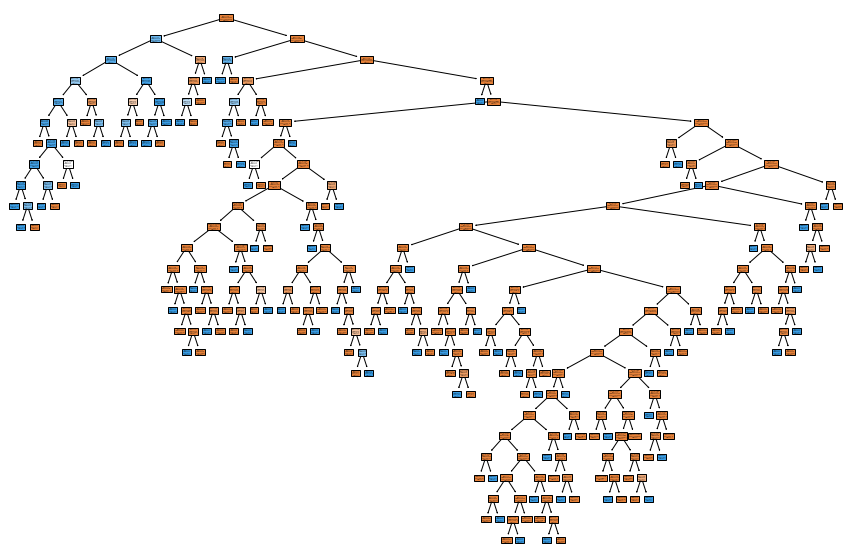

In [16]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=list(y), 
                feature_names=list(X), impurity=True, filled=True)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt_clf, feature_names=list(X), 
                   class_names=list(y), filled=True)

In [17]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("파라미터 :", dt_clf.get_params())
print("정확도 :", accuracy)

파라미터 : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 111, 'splitter': 'best'}
정확도 : 0.9991105181231933


- 트리가 매우 복잡하다.
- 과적합이 되었을 가능성이 있다.

In [18]:
# criterion = "entropy"
dt_clf = DecisionTreeClassifier(criterion="entropy", random_state=111)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
dt_clf = dt_clf.fit(X_train, y_train)

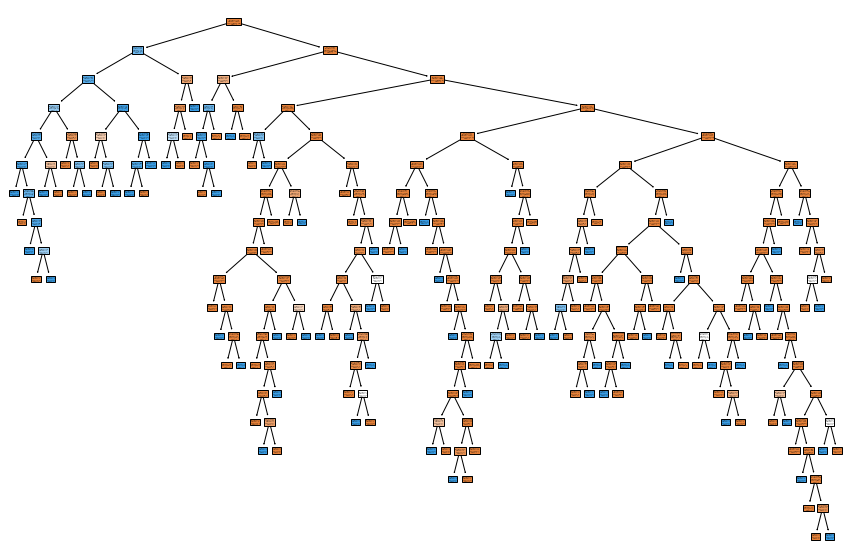

In [19]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=list(y), 
                feature_names=list(X), impurity=True, filled=True)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt_clf, feature_names=list(X), 
                   class_names=list(y), filled=True)

In [20]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("파라미터 :", dt_clf.get_params())
print("정확도 :", accuracy)

파라미터 : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 111, 'splitter': 'best'}
정확도 : 0.9991456292499094


In [21]:
# max_depth = 3
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=111)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
dt_clf = dt_clf.fit(X_train, y_train)

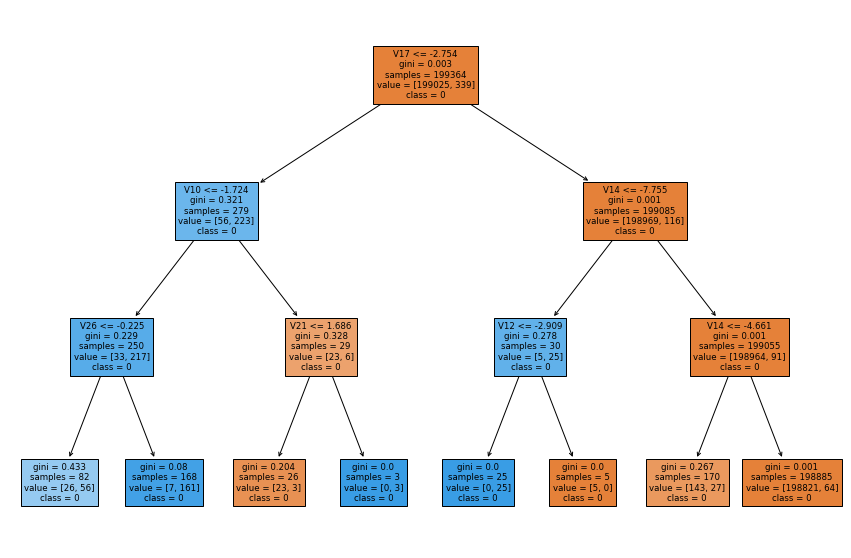

In [22]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=list(y), 
                feature_names=list(X), impurity=True, filled=True)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt_clf, feature_names=list(X), 
                   class_names=list(y), filled=True)

In [24]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("파라미터 :", dt_clf.get_params())
print("정확도 :", accuracy)

파라미터 : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 111, 'splitter': 'best'}
정확도 : 0.9992158515033414


In [27]:
# max_depth = 5
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=111)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
dt_clf = dt_clf.fit(X_train, y_train)

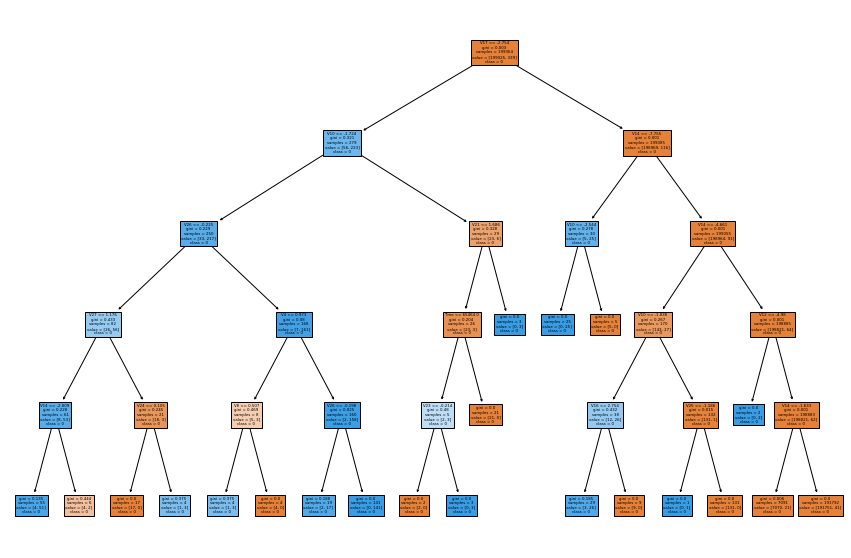

In [28]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=list(y), 
                feature_names=list(X), impurity=True, filled=True)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt_clf, feature_names=list(X), 
                   class_names=list(y), filled=True)

In [29]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("파라미터 :", dt_clf.get_params())
print("정확도 :", accuracy)

파라미터 : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 111, 'splitter': 'best'}
정확도 : 0.9994499256814484


In [30]:
# max_depth = 7
dt_clf = DecisionTreeClassifier(max_depth=7, random_state=111)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
dt_clf = dt_clf.fit(X_train, y_train)

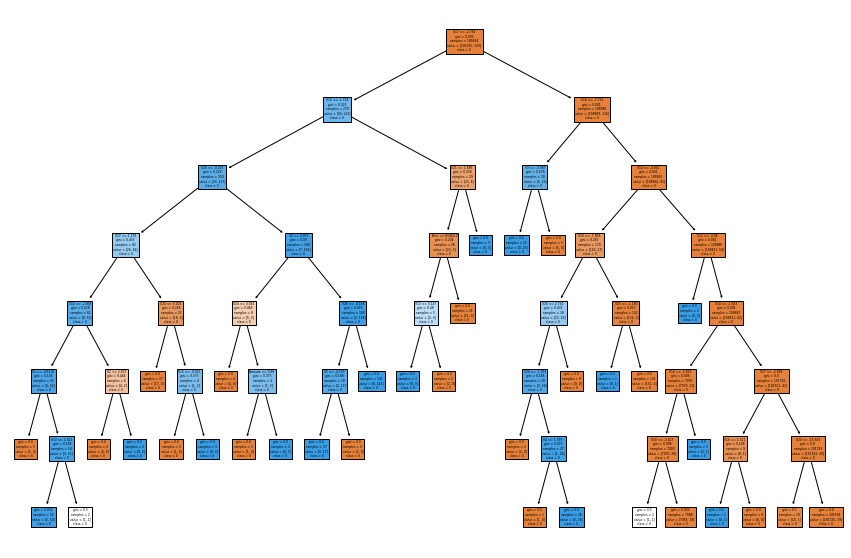

In [31]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=list(y), 
                feature_names=list(X), impurity=True, filled=True)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt_clf, feature_names=list(X), 
                   class_names=list(y), filled=True)

In [32]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("파라미터 :", dt_clf.get_params())
print("정확도 :", accuracy)

파라미터 : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 111, 'splitter': 'best'}
정확도 : 0.9993562960102056


In [82]:
# max_features = 25, max_depth = 5
dt_clf = DecisionTreeClassifier(max_features=25, max_depth=5, random_state=111)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
dt_clf = dt_clf.fit(X_train, y_train)

In [83]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("파라미터 :", dt_clf.get_params())
print("정확도 :", accuracy)

파라미터 : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 25, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 111, 'splitter': 'best'}
정확도 : 0.9994499256814484


In [92]:
# class_weight = "balanced", max_depth = 5
dt_clf = DecisionTreeClassifier(class_weight="balanced", max_depth=5, random_state=111)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
dt_clf = dt_clf.fit(X_train, y_train)

In [93]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("파라미터 :", dt_clf.get_params())
print("정확도 :", accuracy)

파라미터 : {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 111, 'splitter': 'best'}
정확도 : 0.9726367285792867


In [118]:
# ccp_alpha = 0.1, max_depth = 5
dt_clf = DecisionTreeClassifier(ccp_alpha = 0.1, max_depth=5, random_state=111)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
dt_clf = dt_clf.fit(X_train, y_train)

In [119]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("파라미터 :", dt_clf.get_params())
print("정확도 :", accuracy)

파라미터 : {'ccp_alpha': 0.1, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 111, 'splitter': 'best'}
정확도 : 0.9982093325374811


In [120]:
from sklearn.model_selection import GridSearchCV

def tree_tunning(train, y, params, score="accuracy"):
    dt_clf = DecisionTreeClassifier(random_state=111)
    grid = GridSearchCV(dt_clf, params, scoring=score, cv=5)
    grid.fit(train, y)
    
    print(grid.best_params_)
    print(grid.best_score_)
    
    return grid.best_estimator_

In [122]:
param1 = {"min_impurity_decrease":[0.01,0.05,0.1,0.5,1,5,10], "max_depth":[5]}
tree_tunning(X_train, y_train, param1)

{'max_depth': 5, 'min_impurity_decrease': 0.01}
0.9982995928052707


DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.01,
                       random_state=111)

In [124]:
param1 = {"min_samples_leaf":[1,2,3,4,5,6,7], "max_depth":[5]}
tree_tunning(X_train, y_train, param1)

{'max_depth': 5, 'min_samples_leaf': 4}
0.9993980859131435


DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=111)

In [126]:
param1 = {"min_samples_split":[2,3,4,5,6,7], "max_depth":[5]}
tree_tunning(X_train, y_train, param1)

{'max_depth': 5, 'min_samples_split': 5}
0.999352942708871


DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=111)

In [127]:
param1 = {"min_samples_split":[5,6,7], "min_samples_leaf":[3,4,5], "max_depth":[5]}
tree_tunning(X_train, y_train, param1)

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.9993980859131435


DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                       random_state=111)

### 결론
- 피처 25개로 데이터를 분할하는 방식의 정확도가 가장 높다.
- 가중치를 balanced로 지정할 경우 정확도가 떨어진다.
- ccp 파라미터 값은 정확도를 올리지 못한다.
- min_samples_leaf, min_samples_split의 추가 설정은 정확도를 올리지 못한다.
- 과적합을 피하기 위해 최대 깊이(depth)를 5로 제한하는 것이 가장 효과적이었다.